In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [40]:
df = pd.read_csv("data/Crop_Dataset.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,Total_Nutrients,Temperature_Humidity,Log_Rainfall,Label,Label_Encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,175,1712.196283,5.317804,wheat,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,184,1748.595734,5.427834,wheat,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,159,1893.744627,5.579595,wheat,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,149,2123.482908,5.496611,wheat,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,162,1642.720357,5.574878,wheat,0


# 1. Data Exploraton and Preprocessing

In [41]:
# Create a dictionary from the 'Label' and 'Label_Encoded' columns
label_dict = dict(zip(df['Label_Encoded'], df['Label']))

In [42]:
df["Label_Encoded"] = df["Label_Encoded"].astype(str)

In [43]:
df.isna().sum()

N                       0
P                       0
K                       0
temperature             0
humidity                0
ph                      0
rainfall                0
Total_Nutrients         0
Temperature_Humidity    0
Log_Rainfall            0
Label                   0
Label_Encoded           0
dtype: int64

there are no any missing values

In [44]:
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall',
       'Total_Nutrients', 'Temperature_Humidity', 'Log_Rainfall']

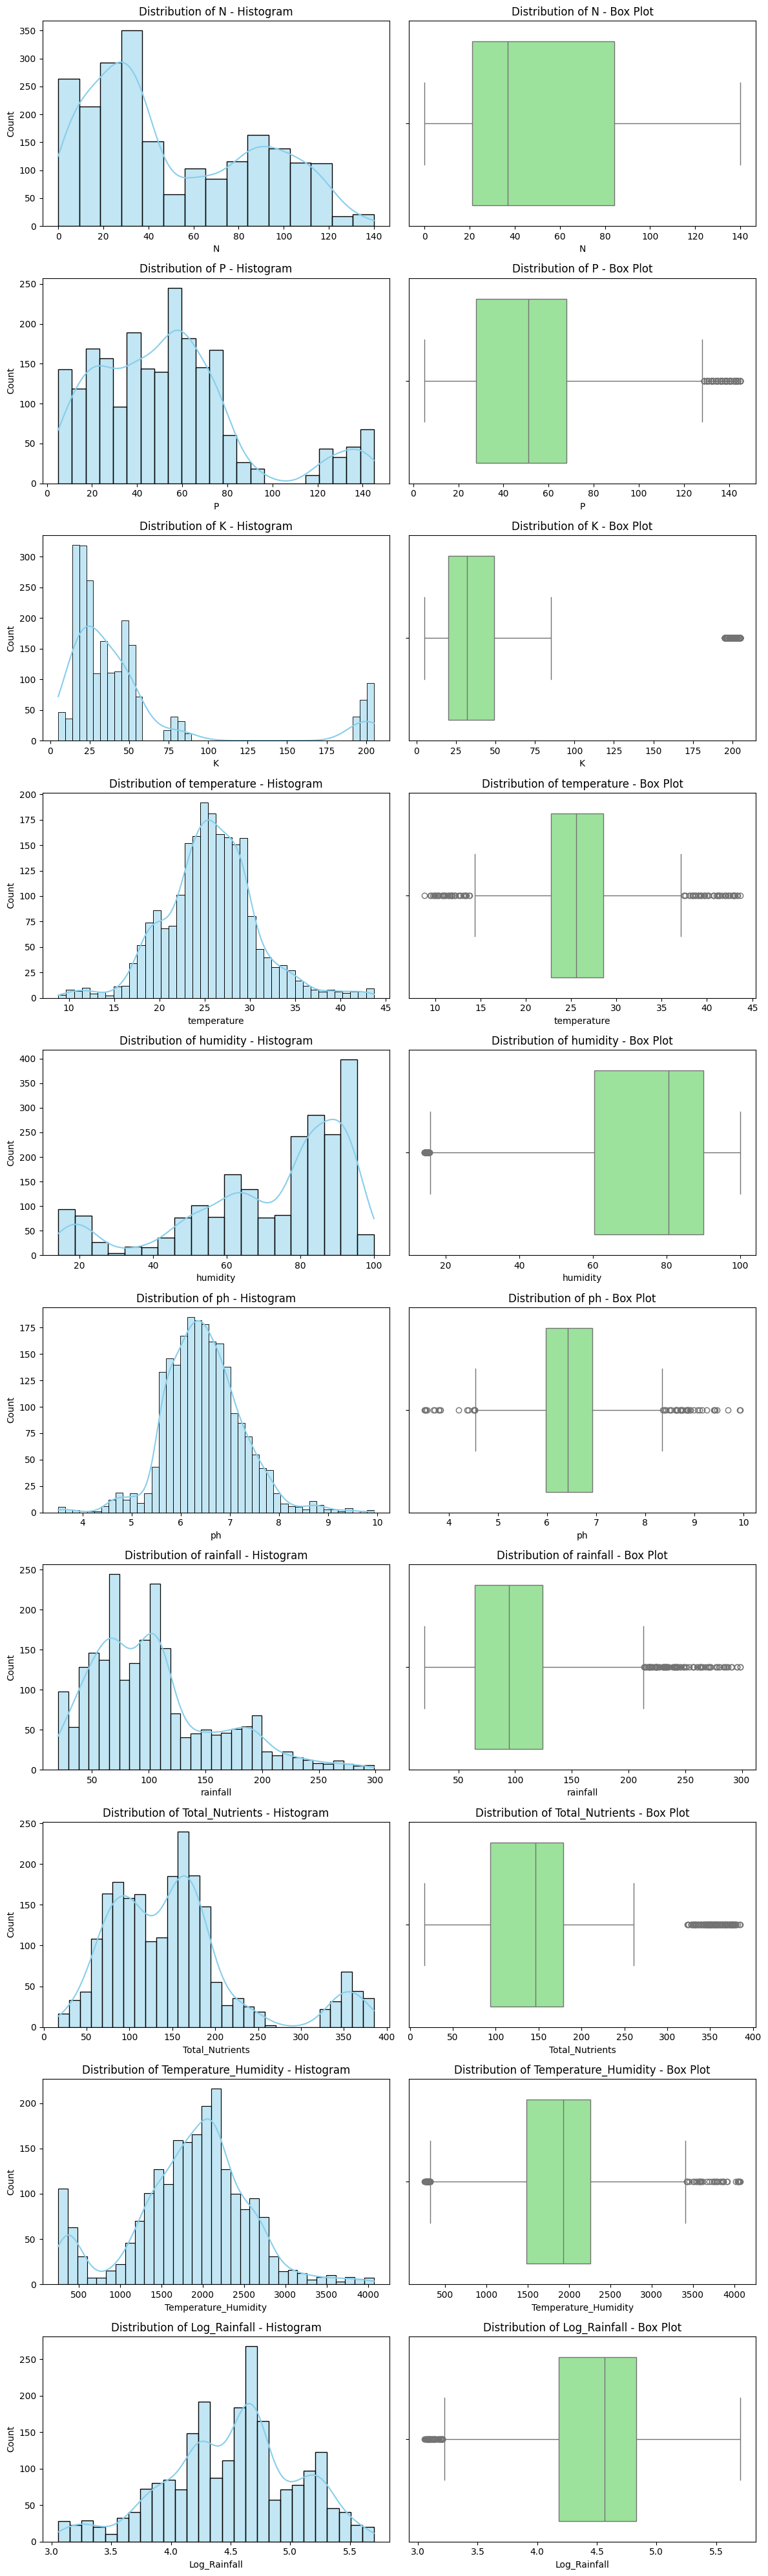

In [45]:

# Set up the matplotlib figure
fig, axes = plt.subplots(len(features), 2, figsize=(12, len(features)*4))

for i, feature in enumerate(features):
    # Histogram on the left
    sns.histplot(df[feature], kde=True, color="skyblue", ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {feature} - Histogram')
    
    # Box plot on the right
    sns.boxplot(x=df[feature], ax=axes[i, 1], color="lightgreen")
    axes[i, 1].set_title(f'Distribution of {feature} - Box Plot')

plt.tight_layout()
plt.show()

## Outlier Detection and Analysis

In [46]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

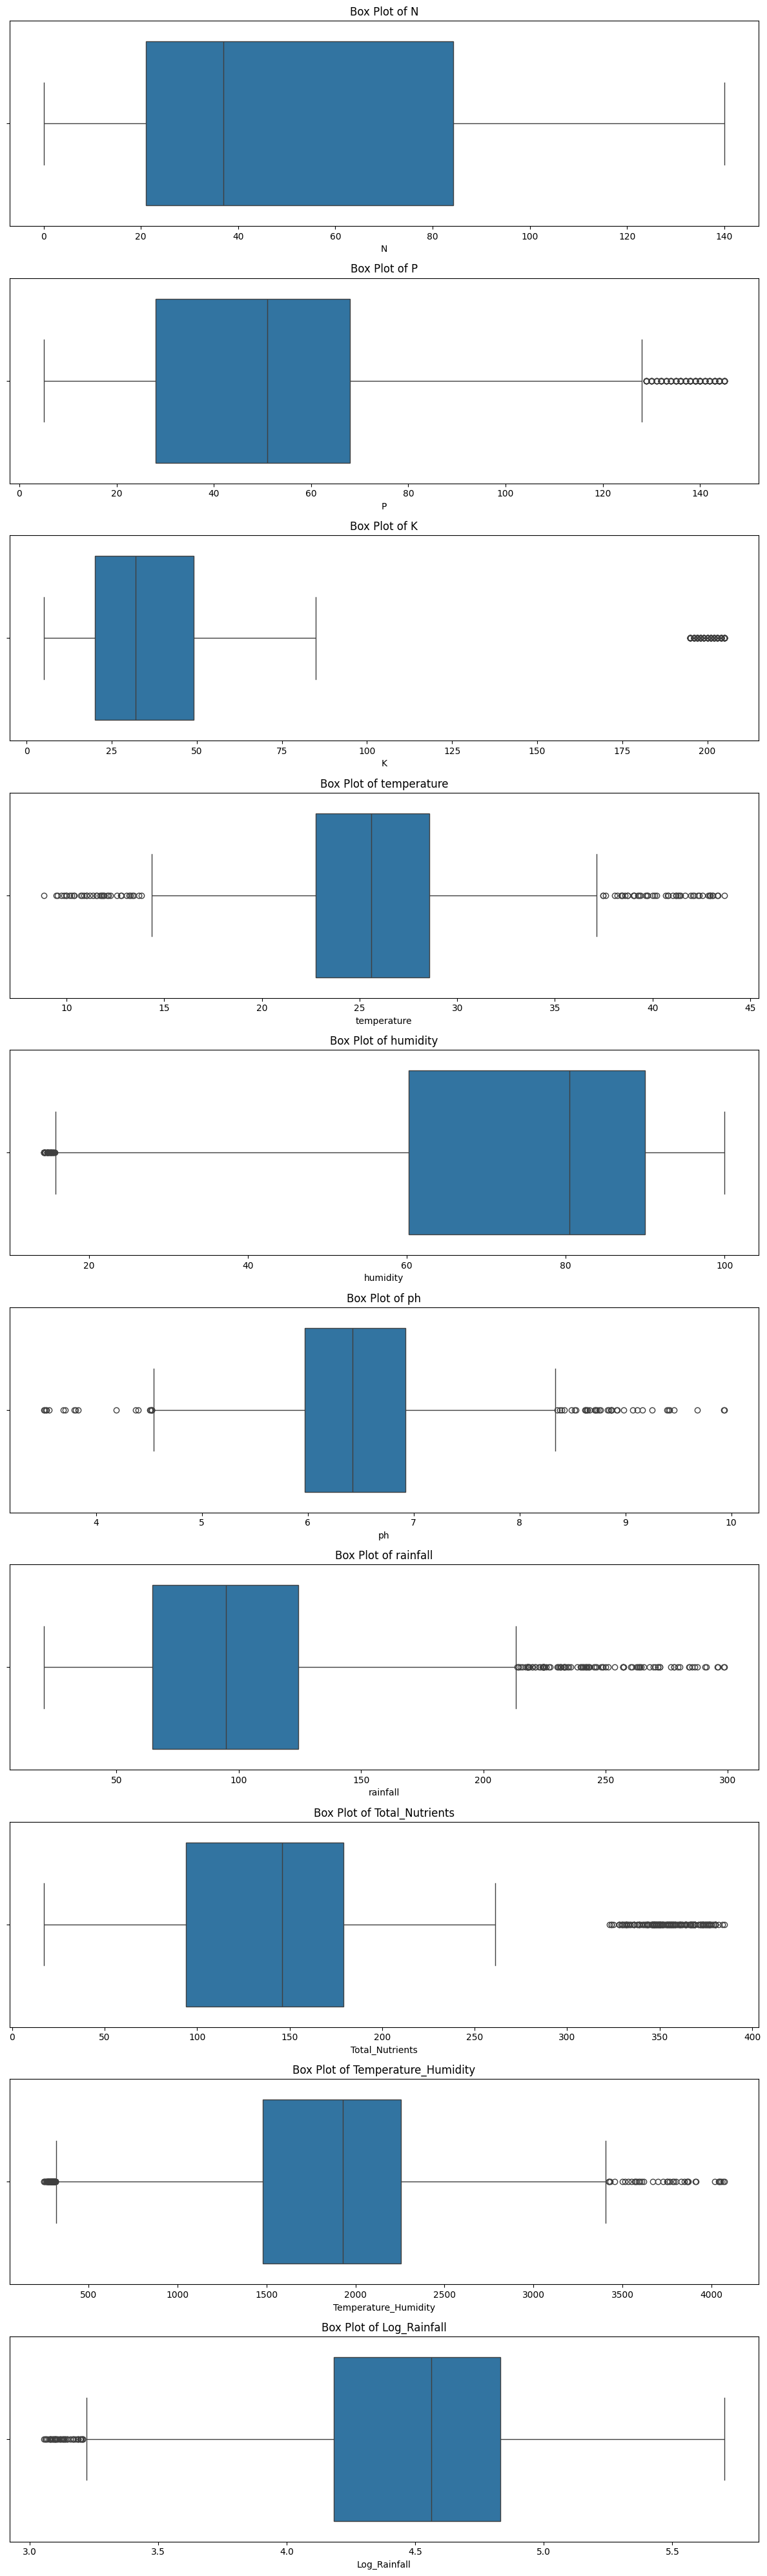

In [47]:
# Set up the matplotlib figure
plt.figure(figsize=(12, len(numerical_cols) * 4))  # Adjust the figure size as needed

# Create a boxplot for each numerical column
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 1, i + 1)  # Create a subplot for each column
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')  # Title for each subplot

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()


### Analysis of Outliers in Each Feature:
1. **Nutrients (N, P, K):**
   - Outliers are mainly on the upper end for phosphorus (P) and potassium (K), but not as pronounced for nitrogen (N). 
   - **Justification**: If these nutrients are critical for specific crops that thrive under high nutrient conditions, it's sensible to retain these outliers. They may represent valid, real-world conditions essential for modeling diverse agricultural scenarios.

2. **Temperature:**
   - There are a few high outliers.
   - **Justification**: These might represent extreme but realistic temperature conditions where certain crops could still thrive (e.g., crops grown in very warm climates).

3. **Humidity:**
   - Outliers are predominantly on the lower end.
   - **Justification**: Low humidity outliers might be necessary to keep if the dataset aims to model crop behavior in arid regions, which is useful for drought-resistant crop analysis.

4. **pH:**
   - Both low and high outliers are present.
   - **Justification**: The pH range for agricultural soils can vary widely depending on the mineral content and geographic characteristics of the soil. Extreme pH values might be crucial for crops that are tolerant to such conditions, hence important for a comprehensive model.

5. **Rainfall:**
   - Significant high outliers.
   - **Justification**: These outliers may represent regions with heavy rainfall, important for crops like rice. Excluding this data could bias the model against such conditions.

6. **Total Nutrients:**
   - Contains high-end outliers.
   - **Justification**: Similar to individual nutrients, some crops may require high overall nutrient levels, and these data points are valuable for capturing that aspect.

7. **Temperature-Humidity and Log_Rainfall:**
   - Outliers in Temperature-Humidity could reflect combined extreme environmental conditions. Log_Rainfall outliers are minimal.
   - **Justification**: These combined or transformed features could capture important interactions or transformations relevant for specific environmental conditions.

### General Justification to Proceed with Outliers:
- **Biological and Environmental Relevance**: Outliers in agricultural datasets often represent extreme but possible growth conditions or soil characteristics. Removing them could strip the model of valuable information about how crops perform under stress or in unique conditions.
- **Robustness in Modeling**: Including outliers can make the model more robust by training it to handle a wider range of conditions, which is particularly valuable for predictive and prescriptive analytics in agriculture.
- **Data Integrity**: Often, outliers are genuine observations and can provide insights into the resilience and adaptability of different crops. Their inclusion helps maintain the integrity of the dataset’s representation of real-world scenarios.

Proceeding with outliers in agricultural datasets is often justified because these outliers can represent valid, extreme but realistic conditions under which crops are grown. Removing them could eliminate valuable information about how different crops perform in varying environmental conditions such as extreme nutrient levels, rainfall, or pH values. Including these outliers ensures that the predictive models are robust and capable of handling a wide range of scenarios, thereby improving their utility in real-world agricultural planning and decision-making. This approach maintains data integrity and ensures that the model's predictions are relevant for all possible conditions, enhancing its applicability and reliability.

## Correlation Analysis

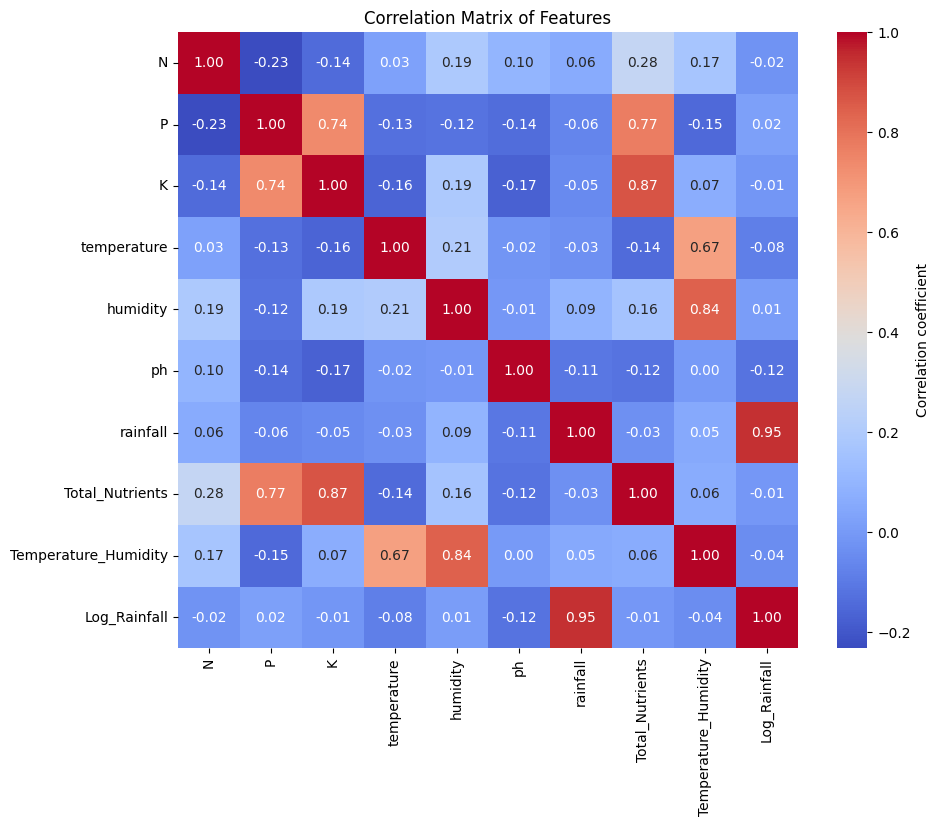

In [48]:
# Compute the correlation matrix
corr_matrix = df[features].corr()

# Generate a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})
plt.title('Correlation Matrix of Features')
plt.show()

1. **Strong Correlation Between Nutrients (P and K)**:
   - Phosphorus (P) and Potassium (K) exhibit a strong positive correlation (0.74). This suggests that regions or soil types that are rich in phosphorus are also likely to be rich in potassium. This information can be used to tailor fertilization strategies, ensuring that crops which need high levels of these nutrients are planted in such soils.

2. **Correlation Between Total Nutrients and Nutrient Levels (P and K)**:
   - Total Nutrients show strong positive correlations with both P (0.77) and K (0.87). This implies that the total nutrient measurement is heavily influenced by the levels of phosphorus and potassium, which could be key indicators of overall soil fertility.

3. **Relationship Between Temperature, Humidity, and Their Combined Index**:
   - Temperature and Humidity have a strong positive correlation (0.84) with their combined index (Temperature_Humidity). This indicates that the index effectively captures variations in both temperature and humidity, which might be useful for models that predict crop success based on climatic conditions.

4. **Negative Correlation Between Nutrients and Temperature**:
   - There is a moderately negative correlation between temperature and both phosphorus (-0.13) and potassium (-0.16). This could suggest that higher temperatures might be associated with lower availability or efficiency of these nutrients, possibly due to increased evaporation or different soil chemistry at higher temperatures.

5. **High Correlation Between Rainfall and Log_Rainfall**:
   - Rainfall and Log_Rainfall show a very high positive correlation (0.95), indicating that the logarithmic transformation of rainfall preserves the relative differences in rainfall amounts well, making Log_Rainfall a potentially more normalized feature that still reflects the original data effectively.

6. **Low Correlations With pH**:
   - pH shows very low correlations with most other variables, suggesting that it varies independently of other environmental factors measured here. This indicates the potential for pH to be a standalone variable in models, not strongly influenced by other typical environmental measurements.


### Analyzing the Correlation Matrix:
1. **High Correlation between P and K (0.74)**: 
   - Since Phosphorus (P) and Potassium (K) are highly correlated, including both in the same model could lead to multicollinearity issues. You might consider using just one of these nutrients or creating a combined feature that captures their shared variance.

2. **High Correlation between Total_Nutrients and P (0.77) & K (0.87)**:
   - Total_Nutrients is strongly correlated with both P and K. This suggests that Total_Nutrients might already represent much of the information provided by these individual nutrients. Therefore, using Total_Nutrients alone could suffice, allowing you to drop P and K to simplify the model.

3. **Temperature_Humidity and Individual Measures (Temperature and Humidity)**:
   - Temperature_Humidity has a very strong correlation with both temperature (0.67) and humidity (0.84). Since this feature combines the effects of temperature and humidity, using this composite feature might be more beneficial than using temperature and humidity separately, thus reducing the number of features without losing crucial information.

### Observations for Feature Dropping and Usage:
- **Drop P and K**: Use Total_Nutrients instead, as it aggregates the information of the nutrients effectively and reduces the dimensionality of the model.
- **Drop Temperature and Humidity**: Use the Temperature_Humidity index as it encapsulates the combined effect of these two variables and is likely more relevant for models predicting outcomes based on climatic conditions.
- **Keep Rainfall or Log_Rainfall**: they are highly correlated (0.95) and use one to reduce multicorliniarity

In [49]:
df = df.drop(columns=["P", "K", "temperature","humidity","rainfall"], axis=1)

## Claass Destribution

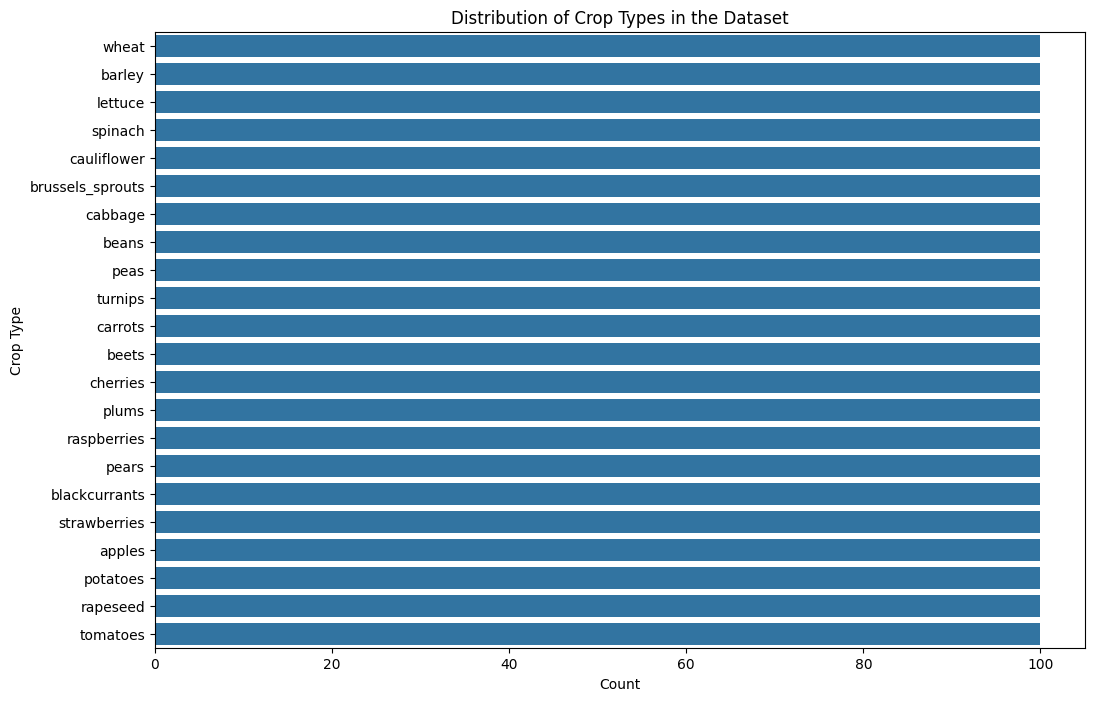

In [50]:
# Count plot for the target variable 'Label'
plt.figure(figsize=(12, 8))
sns.countplot(y='Label', data=df)
plt.title('Distribution of Crop Types in the Dataset')
plt.xlabel('Count')
plt.ylabel('Crop Type')
plt.show()

Perfect dataset with 0% class imblance

## Scaling Features

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [53]:
df.head()

,N,ph,Total_Nutrients,Temperature_Humidity,Log_Rainfall,Label,Label_Encoded
0,1.068797,0.043302,0.287062,-0.203138,1.483789,wheat,0
1,0.933329,0.734873,0.399702,-0.151079,1.685576,wheat,0
2,0.255986,1.771510,0.086813,0.056511,1.963897,wheat,0
3,0.635298,0.660308,-0.038343,0.385081,1.811709,wheat,0
4,0.743673,1.497868,0.124359,-0.302501,1.955246,wheat,0


# 2. Model Training:

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [55]:
# Dictionary of models
models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'SVM': SVC(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'Naive Bayes': GaussianNB()
    }

In [56]:
def train_and_evaluate_models(df, x_features, y):
    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df[x_features], df[y], test_size=0.2, random_state=42,shuffle=True)

    print(y_train.value_counts())
    print(y_test.value_counts())

    
    # Dictionary to hold accuracy, precision, and recall
    model_performance = {
        'Model': [],
        'Accuracy': [],
        'Precision': [],
        'Recall': []
    }
    
    # Train and evaluate each model
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Store performance metrics
        model_performance['Model'].append(name)
        model_performance['Accuracy'].append(accuracy_score(y_test, y_pred))
        model_performance['Precision'].append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
        model_performance['Recall'].append(recall_score(y_test, y_pred, average='weighted', zero_division=0))

        # Plotting the confusion matrix for each model
        # cm = confusion_matrix(y_test, y_pred)
        # disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        # disp.plot(cmap='Blues')
        # plt.title(f'Confusion Matrix for {name}')
        # plt.show()
    
    # Convert dictionary to DataFrame
    performance_df = pd.DataFrame(model_performance)

    return performance_df

In [57]:
x_features=['N',
            'ph',
            'Total_Nutrients',
            'Temperature_Humidity',
            'Log_Rainfall']

y = "Label_Encoded"

In [58]:
results_df = train_and_evaluate_models(df,x_features,y).sort_values("Accuracy",ascending=False)

Label_Encoded
8     89
16    86
12    86
14    83
19    83
21    83
11    81
6     81
13    81
0     81
3     80
7     80
10    79
1     79
4     77
17    77
20    77
9     77
15    77
5     76
2     74
18    73
Name: count, dtype: int64
Label_Encoded
18    27
2     26
5     24
20    23
17    23
15    23
4     23
9     23
1     21
10    21
7     20
3     20
13    19
6     19
11    19
0     19
21    17
19    17
14    17
16    14
12    14
8     11
Name: count, dtype: int64


# 3. Model Evaluaton:

In [59]:
results_df

,Model,Accuracy,Precision,Recall
5,Gradient Boosting,0.963636,0.965589,0.963636
6,Naive Bayes,0.959091,0.962417,0.959091
2,Random Forest,0.952273,0.955818,0.952273
1,Decision Tree,0.936364,0.937629,0.936364
3,SVM,0.925000,0.942825,0.925000
0,Logistic Regression,0.904545,0.918771,0.904545
4,K-Nearest Neighbors,0.897727,0.912729,0.897727


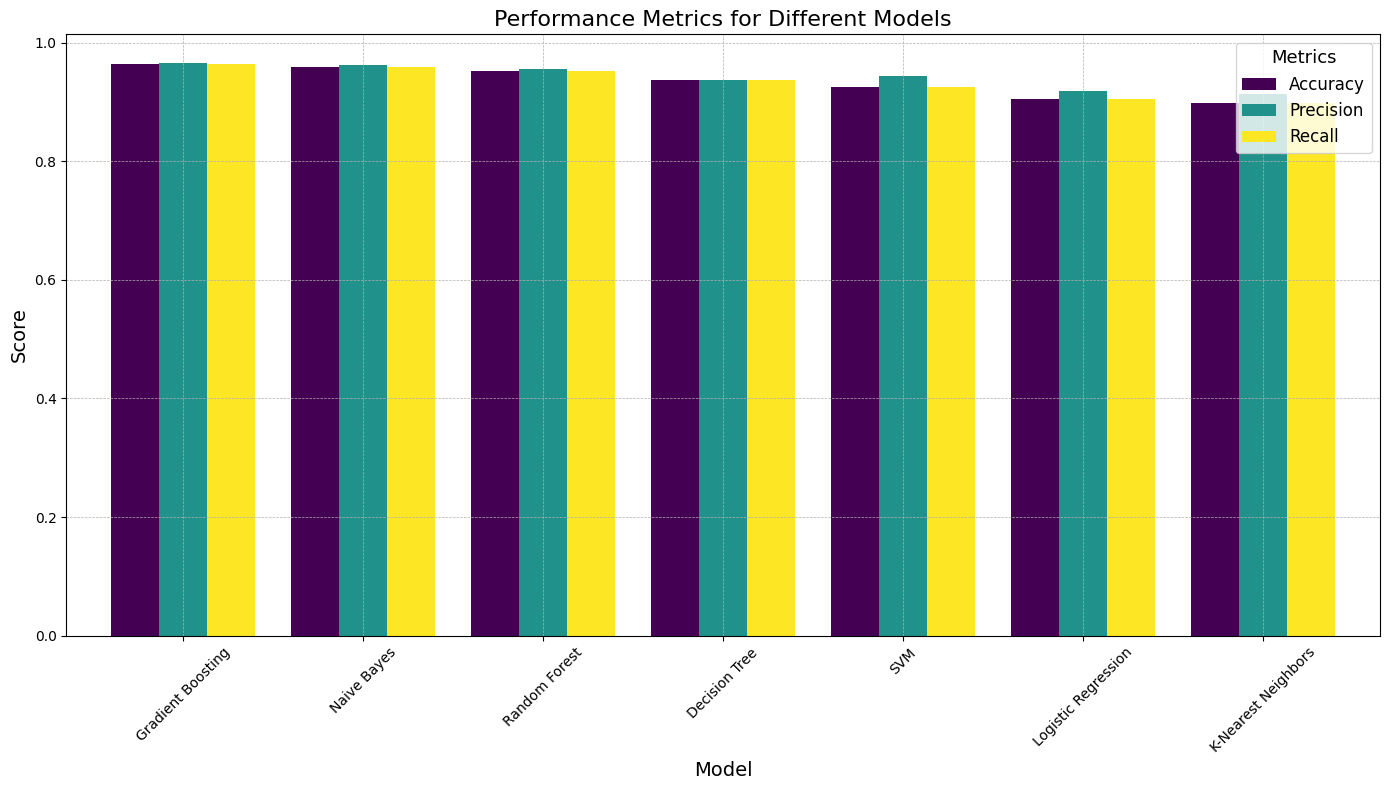

In [60]:
# Set the 'Model' as the index for easier plotting
results_df.set_index('Model', inplace=True)

# Plotting
ax = results_df.plot(kind='bar', figsize=(14, 8), width=0.8, colormap='viridis')
ax.set_title('Performance Metrics for Different Models', fontsize=16)
ax.set_ylabel('Score', fontsize=14)
ax.set_xlabel('Model', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(title='Metrics', title_fontsize='13', fontsize='12')
plt.tight_layout()
plt.show()

# 4. Joblib Model Creaton and Predicton

In [61]:
from joblib import dump
import joblib

In [62]:
model = models["Gradient Boosting"]

In [63]:
# Save the model to a file
dump(model, 'model/random_forest_model.joblib')

['model/random_forest_model.joblib']

#### Load Model

In [64]:
# Later... Load the model
loaded_model = joblib.load('model/random_forest_model.joblib')

In [65]:
def predict_classes(model, data):
    prob=model.predict_proba(data)
    classes=model.classes_.tolist()
    prob=prob[0].tolist()
    results={"Crop":classes,"Probability":prob}
    results = pd.DataFrame(results).sort_values("Probability",ascending=False)
    # results['Crop'] = df['Crop'].replace(label_dict)
    return results


In [66]:
label_dict

{0: 'wheat',
 1: 'barley',
 2: 'lettuce',
 3: 'spinach',
 4: 'cauliflower',
 5: 'brussels_sprouts',
 6: 'cabbage',
 7: 'beans',
 8: 'peas',
 9: 'turnips',
 10: 'carrots',
 11: 'beets',
 12: 'cherries',
 13: 'plums',
 14: 'raspberries',
 15: 'pears',
 16: 'blackcurrants',
 17: 'strawberries',
 18: 'apples',
 19: 'potatoes',
 20: 'rapeseed',
 21: 'tomatoes'}

In [67]:
df.shape

(2200, 7)

In [68]:
df.iloc[[2199]]

,N,ph,Total_Nutrients,Temperature_Humidity,Log_Rainfall,Label,Label_Encoded
2199,1.448109,0.401096,-0.000796,-0.613112,0.819134,tomatoes,21


In [69]:
predict_classes(loaded_model,df[x_features].iloc[[2199]])

,Crop,Probability
14,21,9.999900e-01
17,5,2.272234e-06
13,20,1.402748e-06
16,4,1.359527e-06
0,0,1.199098e-06
11,19,1.121382e-06
9,17,9.021038e-07
20,8,6.636300e-07
19,7,4.244252e-07
1,1,1.873191e-07


In [70]:
df.iloc[[2000]]

,N,ph,Total_Nutrients,Temperature_Humidity,Log_Rainfall,Label,Label_Encoded
2000,1.041704,-0.603487,0.274546,-0.01446,0.955424,rapeseed,20


In [71]:
predict_classes(model,df[x_features].iloc[[2000]])

,Crop,Probability
13,20,0.999020
14,21,0.000314
0,0,0.000242
17,5,0.000120
16,4,0.000093
20,8,0.000073
9,17,0.000055
1,1,0.000026
19,7,0.000017
21,9,0.000011


# Setup

# intellihack

To set up a Python environment and install the necessary dependencies from a `requirements.txt` file for running the crop prediction notebook, follow these detailed steps:

### Step 1: Install Python
Ensure that Python is installed on your system. You can download and install the latest version from [python.org](https://www.python.org/downloads/).

### Step 2: Create a Virtual Environment
Creating a virtual environment is recommended to manage the dependencies for your project separately from other Python projects. Here’s how you can do it:

1. Open your command line interface (CLI), such as Terminal on macOS or Command Prompt on Windows.
2. Navigate to the project directory where you want the virtual environment to be set up:
   ```bash
   cd path/to/your/project
   ```
3. Run the following command to create a virtual environment named `env`:
   ```bash
   python -m venv env
   ```

### Step 3: Activate the Virtual Environment
Before installing the dependencies, activate the virtual environment:

- **On macOS and Linux**:
  ```bash
  source env/bin/activate
  ```
- **On Windows**:
  ```bash
  env\Scripts\activate
  ```

### Step 4: Install Dependencies
With the virtual environment activated, install the dependencies specified in the `requirements.txt` file:

1. Ensure that the `requirements.txt` file is in the project directory or specify the path to it.
2. Install the dependencies using pip:
   ```bash
   pip install -r requirements.txt
   ```

### Step 5: Verify Installation
After installation, you can verify that the correct packages were installed by listing them:
```bash
pip list
```

### Step 6: Running the Notebook
With the environment set up and dependencies installed, you can now run the Jupyter notebook:

1. Install JupyterLab or Jupyter Notebook if you haven’t already:
   ```bash
   pip install jupyterlab
   ```
2. Start JupyterLab or Notebook:
   ```bash
   jupyter lab
   ```
   or
   ```bash
   jupyter notebook
   ```
3. Open the notebook file (`Crop Prediction.ipynb`) in the Jupyter interface that opens in your browser.
4. Run the notebook cells sequentially by pressing `Shift + Enter` on each cell or using the run button in the interface.

These steps will ensure that you have a functional Python environment ready for executing and exploring the crop prediction model.